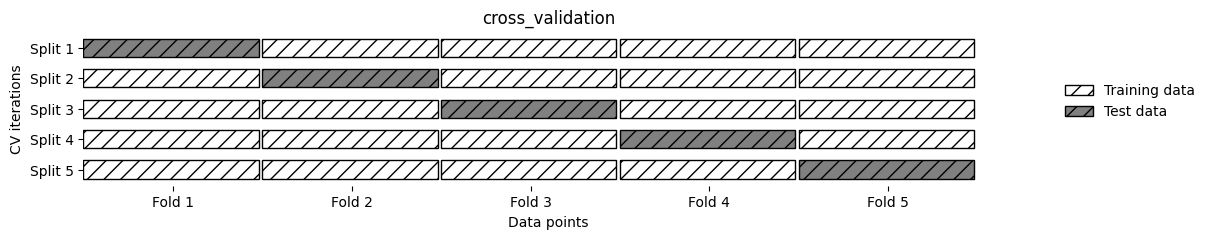

In [4]:
%matplotlib inline
# On subdivise le jeu de données en sous-ensembles ou folds. Puis on évalue un indicateur d'exactitude de prédiction
# sur chacun des folds.

import mglearn

mglearn.plots.plot_cross_validation()

In [9]:
# Evaluation croisée sur 5 folds du modèle de régression logistique entraîné sur le jeu de test iris
# La validation croisée est dit stratifiée lorsque les plis respectent la distribution relative des classes dans 
# l'ensemble global 
# eg pour x échantillons, si la distribution est de 80% de classe A, 20% de classe B répartie dans les échantillons
# telle que AAAAAAAAAABB cette répartition sera respectée lors de la création des folds.

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(solver='liblinear')

scores = cross_val_score(logreg, iris.data, iris.target, cv=5)

print("Score validation croisée : {}".format(scores))
print("Moyenne : {:.3f}".format(scores.mean()))

# On obtient une exactitude de 96%

Score validation croisée : [1.         0.96666667 0.93333333 0.9        1.        ]
Moyenne : 0.960


In [12]:
# Répartition du jeu iris 
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
# En utilisant un validation croisée à 3 plis non stratifiés pour le jeu iris :

from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)
scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
print("Score validation croisée non stratifée à 3 plis : {}".format(scores))

Score validation croisée non stratifée à 3 plis : [0. 0. 0.]


In [20]:
# En redistibuant aléatoirement les données lors de la création des plis : 
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
print("Score validation croisée non stratifée à 3 plis avec shuffle : {}".format(scores))

Score validation croisée non stratifée à 3 plis avec shuffle : [0.9  0.96 0.96]


In [23]:
# En poussant le curseur sur le nombre de plis, au maximum on peut faire de la validation croisée sur n-1 nombre 
# de plis avec n le nombre d'échantillon.
# Cette méthode est appelée LOO : Leave One Out
# Elle est très gourmande en ressource ( loi exponentielle oblige )

from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)
print("Nombre d'iterations : {}".format(len(scores)))
print("Score validation croisée LOO moyenne : {}".format(scores.mean()))

Nombre d'iterations : 150
Score validation croisée LOO moyenne : 0.9533333333333334


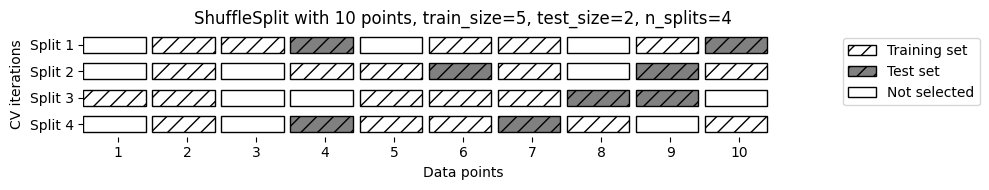

In [27]:
# Validation croisée répétée : On subdivise le jeu de données en n splits et on sélectionne 2 compositions des ces
# sous-ensembles comme jeu de test et comme jeu d'entraînement.
mglearn.plots.plot_shuffle_split()

In [34]:
# Application de la validation croisée répétée au jeu de données iris : sur 10 splits 5/5 (50%/50%)
# Il existe une version stratifiée de ShuffleSplit : StratifiedShuffleSplit

from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
scores = [round(s,3) for s in scores]
print("Validation croisée répétée : {}".format(scores))

Validation croisée répétée : [0.947, 0.907, 0.96, 0.907, 0.933, 0.947, 0.933, 0.947, 0.96, 0.867]


Scores validation croisée : [0.75       0.8        0.66666667]


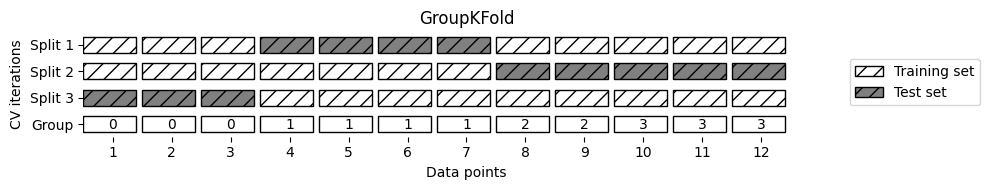

In [40]:
# Lorsqu'on veut ne pas séparer des groupes intrinsèques au jeu de données dans des plis différents, on se servira
# de la validation croisée avec groupes
# On se sert de cette validation pour évaluer la généralisation de la reconnaissance d'une propriété commune
# à tous les groupes tout en ne pouvant pas la découpler des groupes eux_mêmes : reconnaissance d'émotions 
# dans des visages, reconnaissance de mots pour différentes personnes, analyse d'échantillons médicaux pour une même
# personne que l'on applique à une autre

from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs 
X,y = make_blobs(n_samples=12, random_state=0)
groups = [ 0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups=groups,cv=GroupKFold(n_splits=3))
print("Scores validation croisée : {}".format(scores))

mglearn.plots.plot_group_kfold()